In [1]:
# ris dataframe
import pandas as pd
ris = pd.read_pickle("../../../data/anno_sps_df")
ris_need = ris[['Genome ID', 'Antibiotic', 'Resistant Phenotype', 'Measurement Value', 'Species']]

In [2]:
ris_need.head()

,Genome ID,Antibiotic,Resistant Phenotype,Measurement Value,Species
0,1438670.3,ceftriaxone,Resistant,32,Escherichia
1,1438776.3,ertapenem,Resistant,nan,Klebsiella
2,573.9724,amoxicillin/clavulanic acid,Resistant,32/16,Klebsiella
3,1400157.3,imipenem,Intermediate,2,Escherichia
4,72407.183,piperacillin/tazobactam,Non-susceptible,64/4,Klebsiella


In [3]:
ris_need.loc[ris_need["Resistant Phenotype"].isnull()]

,Genome ID,Antibiotic,Resistant Phenotype,Measurement Value,Species
11,1400151.3,tigecycline,NaN,8,Enterobacter
34,1438696.3,cephalothin,NaN,1,Escherichia
58,1400178.3,tigecycline,NaN,2,Klebsiella
113,1400178.3,cephalothin,NaN,16,Klebsiella
122,1329853.3,tigecycline,NaN,2,Enterobacter
133,72407.234,polymyxin B,NaN,1,Klebsiella
144,1328377.3,cephalothin,NaN,8,Klebsiella
174,72407.189,ticarcillin/clavulanic acid,NaN,128/2,Klebsiella
183,1328370.3,cephalothin,NaN,1,Klebsiella
197,72407.178,tigecycline,NaN,1,Klebsiella


In [4]:
# classification tool
clsi = pd.read_excel("../../../data/CLSI_m100_breakpoint.xlsx")
category = clsi[['category', 'drug']]
category = category.drop_duplicates(subset = 'drug')

In [5]:
order = ['penicillins', 'b_lactam_inhibitor', 'cephems', 'monobactams', 'carbapenems', 'lipopeptides', 'phenicols', 'macrolides', 'aminoglycosides', 'tetracyclines', 'quinolones', 'folate_path','nitrofurans', 'fosfomycins']

In [6]:
for i in order:
    category.loc[category['category'] == i,'order'] = order.index(i) 
category

,category,drug,order
0,nitrofurans,nitrofurantoin,12.0
1,quinolones,ciprofloxacin,10.0
2,quinolones,levofloxacin,10.0
3,quinolones,ofloxacin,10.0
4,folate_path,trimethoprim/sulfamethoxazole,11.0
5,folate_path,sulfonamides,11.0
6,folate_path,trimethoprim,11.0
7,phenicols,chloramphenicol,6.0
8,fosfomycins,fosfomycin,13.0
9,aminoglycosides,netilmicin,8.0


In [7]:
# generate antibiotic v.s. genome distribution matrix
genome = ris_need['Genome ID'].unique()
abx = ris_need['Antibiotic'].unique()
matrix = pd.DataFrame(columns = abx, index = genome, dtype = float)

# level of resistance to number
level = {'Resistant': 5,
        'Non-susceptible' : 4,
        'Intermediate': 3,
        'Not defined': 2,
        'Susceptible': 1}
for index, row in ris_need.iterrows():
    if row['Resistant Phenotype'] in list(level.keys()):
        matrix.loc[row['Genome ID'], row['Antibiotic']] = level[row['Resistant Phenotype']]

In [8]:
# sort against category of drug
category_subset = category.loc[category['drug'].isin(abx)]
sorted_drug = category_subset.sort_values('order')['drug']

In [9]:
# sorted matrix
sub_matrix = matrix[sorted_drug]
sub_matrix = sub_matrix.sort_values("gentamicin")
m = sub_matrix.as_matrix()
# -10 for nan

In [17]:
sub_matrix

,piperacillin,ampicillin,piperacillin/tazobactam,ampicillin/sulbactam,amoxicillin/clavulanic acid,cefotetan,cefepime,cefotaxime,ceftriaxone,cefazolin,...,doxycycline,tetracycline,norfloxacin,nalidixic acid,levofloxacin,ciprofloxacin,trimethoprim,trimethoprim/sulfamethoxazole,nitrofurantoin,fosfomycin
1438670.3,NaN,4.0,NaN,4.0,NaN,NaN,5.0,NaN,5.0,5.0,...,5.0,1.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN
1400182.3,NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,5.0,5.0,NaN,2.0,5.0,NaN
1400160.3,NaN,NaN,4.0,4.0,NaN,NaN,5.0,NaN,5.0,5.0,...,1.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN
1284829.3,NaN,NaN,4.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,...,3.0,NaN,NaN,NaN,5.0,4.0,NaN,5.0,NaN,NaN
1329838.3,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
72407.271,NaN,NaN,4.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,...,3.0,NaN,NaN,NaN,5.0,4.0,NaN,5.0,NaN,NaN
244366.45,NaN,5.0,1.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,...,NaN,5.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
573.1733,NaN,4.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
1438688.3,NaN,5.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,5.0,1.0,NaN
1400169.3,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,NaN


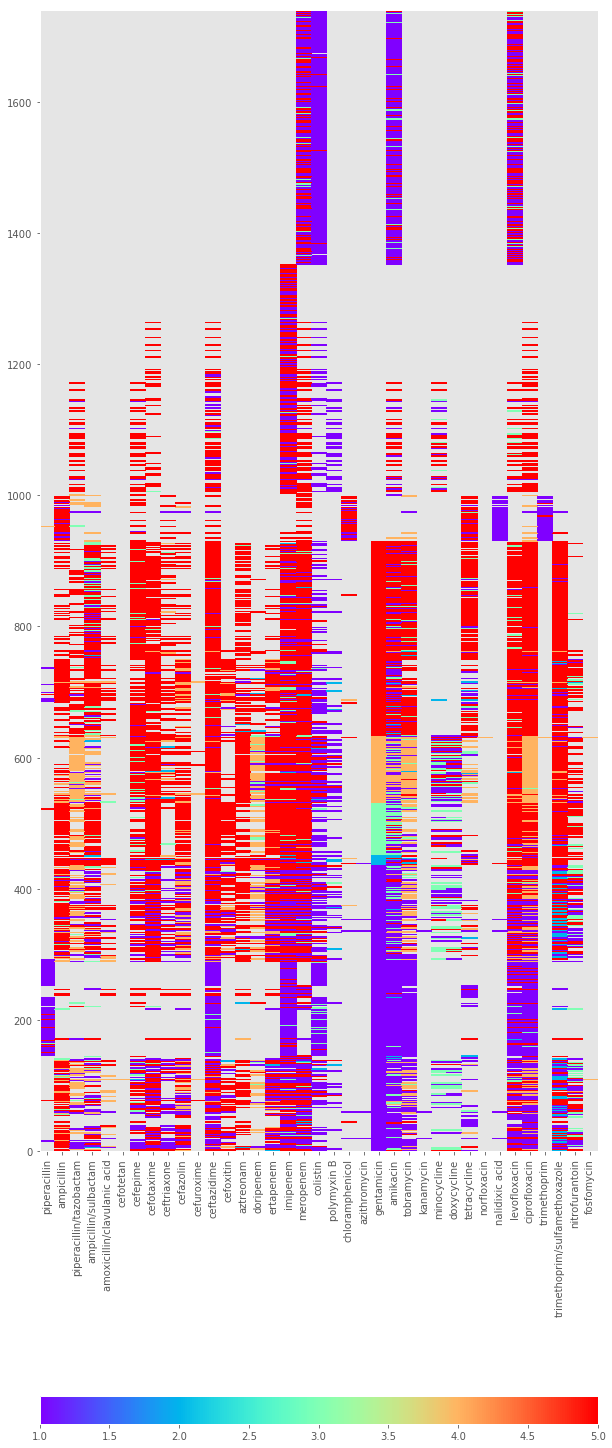

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.style.use("ggplot")
# plot inline
%matplotlib inline

plt.figure(figsize = (10,30))
m = np.ma.masked_where(np.isnan(m),m)
plt.pcolor(m, cmap='rainbow', vmin=1, vmax=5)
plt.xticks(np.arange(0.5, len(sub_matrix.columns), 1), sub_matrix.columns, rotation = 90)
plt.colorbar(orientation='horizontal')
plt.show()

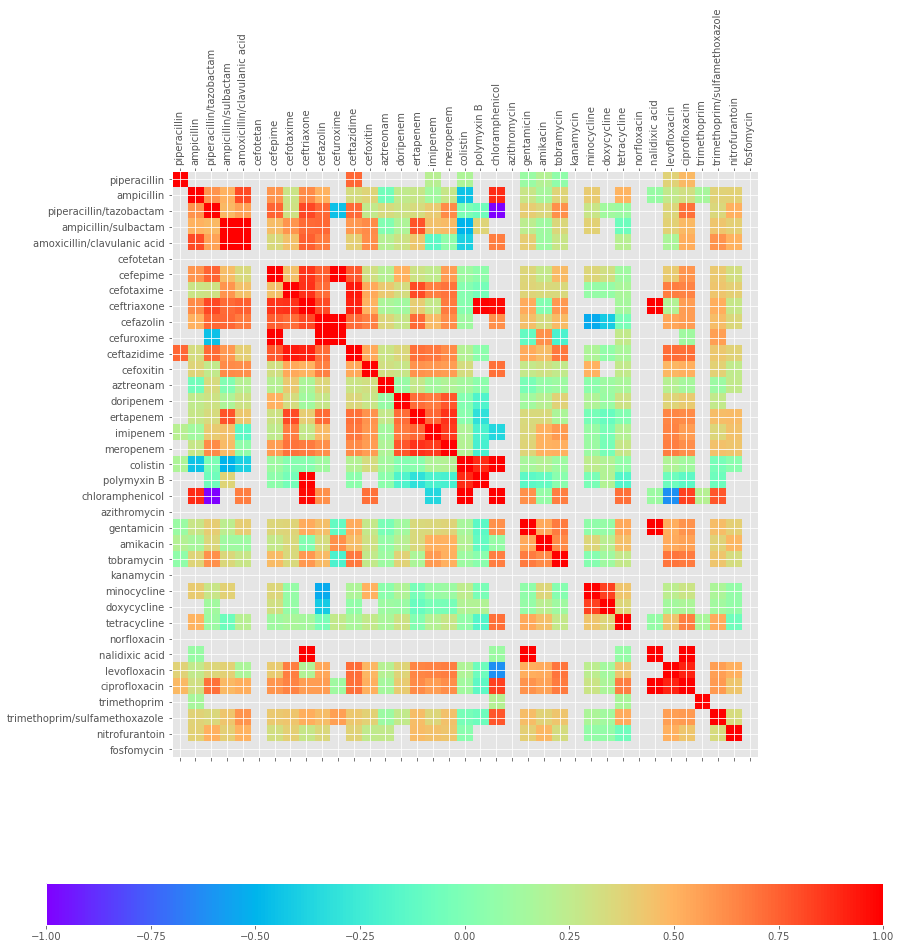

In [11]:
plt.figure(figsize = (15,15))
plt.matshow(sub_matrix.corr(), cmap = 'rainbow', fignum=1)
plt.xticks(np.arange(0, len(sub_matrix.columns), 1), sub_matrix.columns, rotation = 90)
plt.yticks(np.arange(0, len(sub_matrix.columns), 1), sub_matrix.columns)
plt.colorbar(orientation='horizontal')
plt.show()


,piperacillin,ampicillin,piperacillin/tazobactam,ampicillin/sulbactam,amoxicillin/clavulanic acid,cefotetan,cefepime,cefotaxime,ceftriaxone,cefazolin,...,doxycycline,tetracycline,norfloxacin,nalidixic acid,levofloxacin,ciprofloxacin,trimethoprim,trimethoprim/sulfamethoxazole,nitrofurantoin,fosfomycin
1438670.3,NaN,4.0,NaN,4.0,NaN,NaN,5.0,NaN,5.0,5.0,...,5.0,1.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN
1328434.3,NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,1.0,NaN
1438679.3,NaN,4.0,1.0,4.0,NaN,NaN,1.0,NaN,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,1.0,NaN
1438680.3,NaN,4.0,1.0,3.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,NaN
1438682.3,NaN,4.0,1.0,3.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN
1438686.3,NaN,5.0,NaN,5.0,NaN,NaN,NaN,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,5.0,NaN
1328449.3,NaN,4.0,1.0,3.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN
1328432.3,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN
1438674.3,NaN,4.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,1.0,NaN
1438671.3,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN


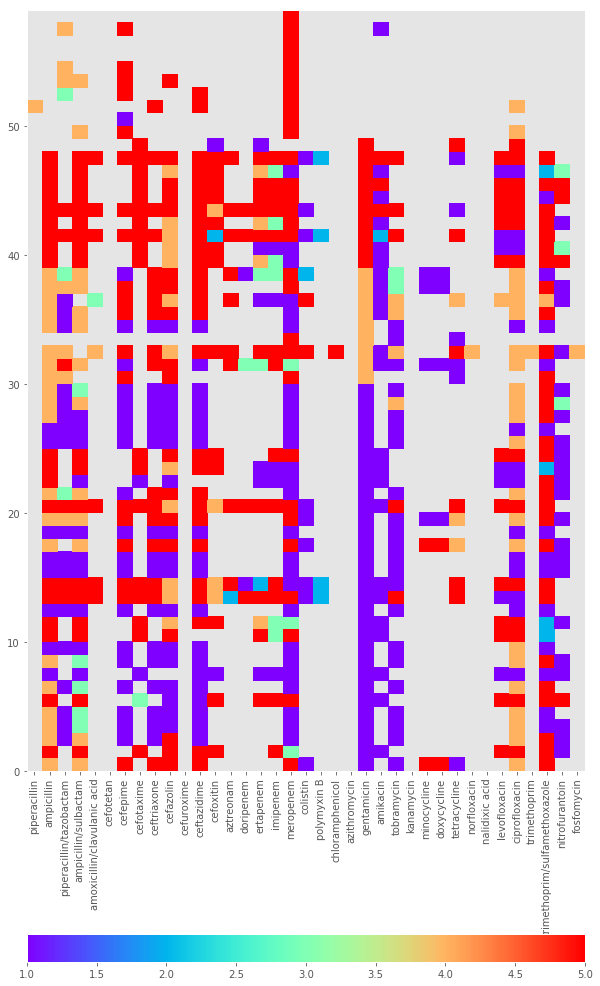

In [12]:
ec = sub_matrix.loc[ris_need.loc[ris_need['Species'] == 'Escherichia']['Genome ID'].unique()]
ec = ec.sort_values("gentamicin")
m = ec.as_matrix()

plt.figure(figsize = (10,20))
m = np.ma.masked_where(np.isnan(m),m)
plt.pcolor(m, cmap='rainbow', vmin=1, vmax=5)
plt.xticks(np.arange(0.5, len(ec.columns), 1), ec.columns, rotation = 90)
plt.colorbar(orientation='horizontal')
plt.show()

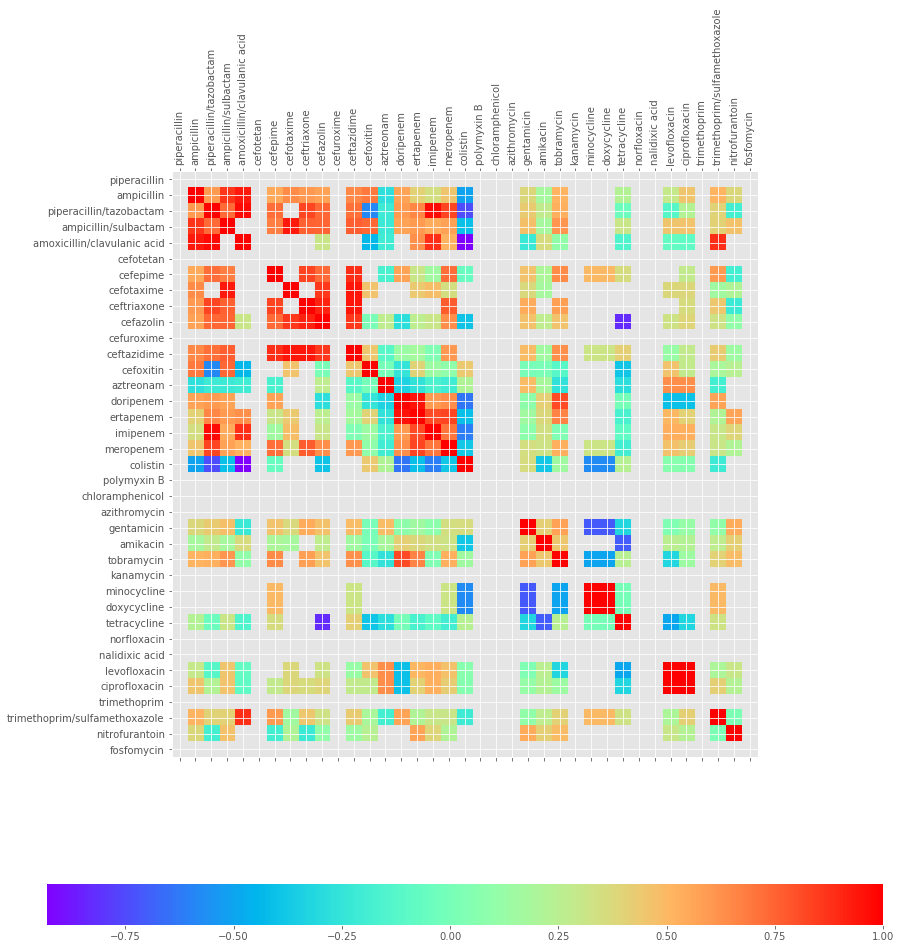

In [13]:
plt.figure(figsize = (15,15))
plt.matshow(ec.corr(), cmap = 'rainbow', fignum=1)
plt.xticks(np.arange(0, len(ec.columns), 1), ec.columns, rotation = 90)
plt.yticks(np.arange(0, len(ec.columns), 1), ec.columns)
plt.colorbar(orientation='horizontal')
plt.show()